In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'pandas'

In [3]:
df = pd.read_csv("diabetes-data.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

df1 = df.copy()

In [8]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

NameError: name 'df' is not defined

In [11]:
df.shape

(768, 9)

In [12]:
# simple imputer is a technique of imputing missing values in multiples columns at once.
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='median')
df1 = si.fit_transform(df)

In [13]:
# once missing values are filled by simple imputer, the dataframe is converted to an array. 
# so we need to convert it back to dataframe.
df = pd.DataFrame(df1,columns=df.columns)
# checking null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

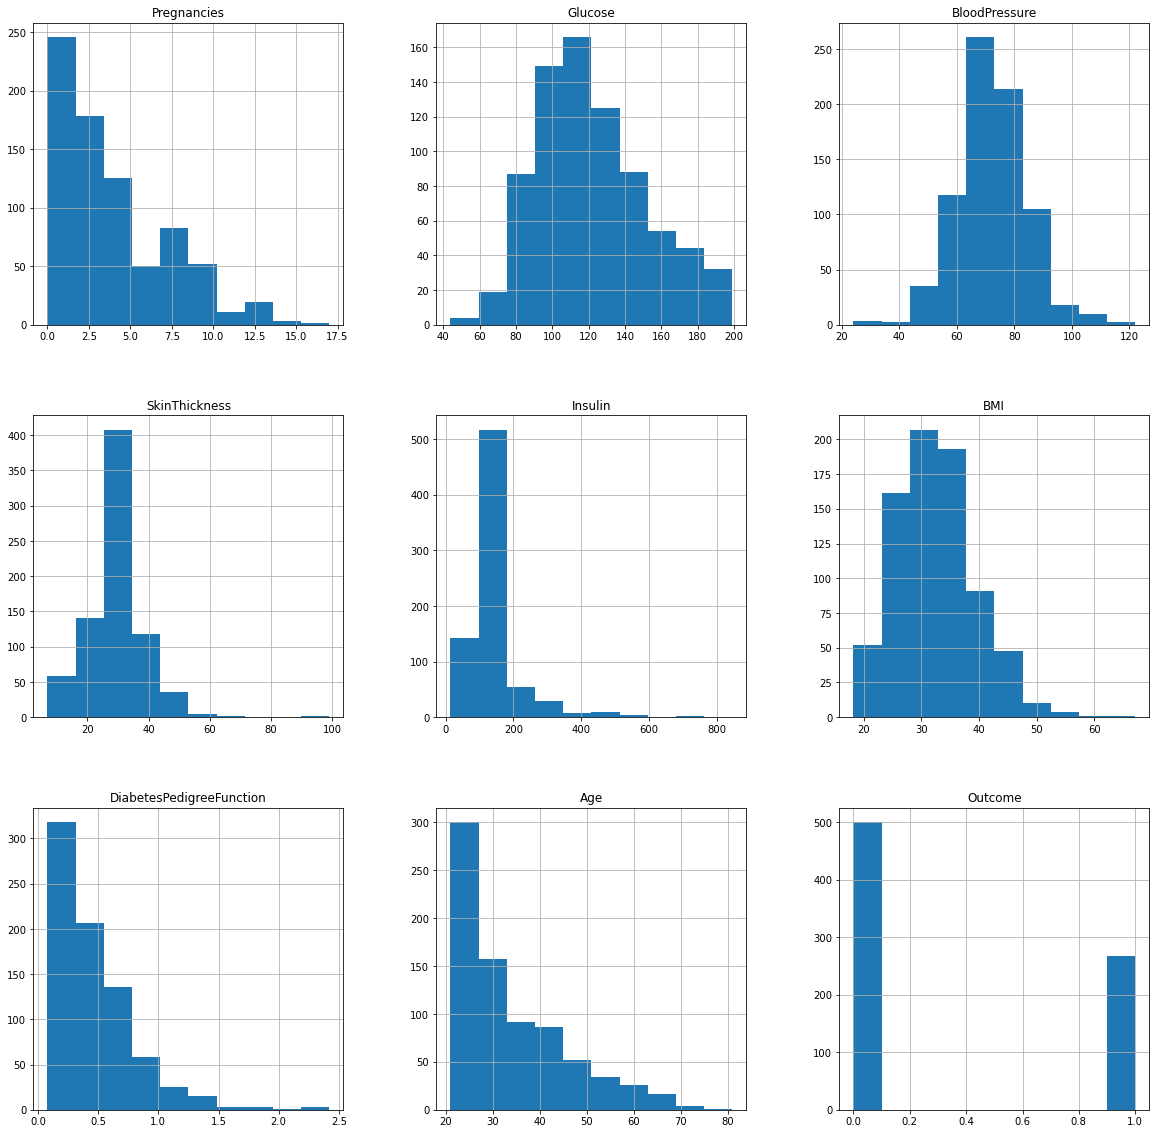

In [14]:
df.hist(figsize=(20,20))
plt.show()

0.0    500
1.0    268
Name: Outcome, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


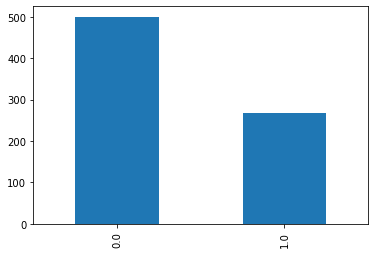

In [15]:
print(df.Outcome.value_counts())
print(df.Outcome.value_counts().plot(kind="bar"))

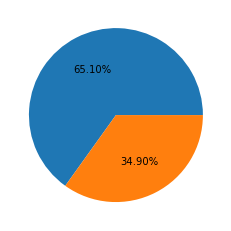

In [16]:
plt.pie(df.Outcome.value_counts(),autopct="%.2f%%",explode=[0.0,0.0])
plt.show()

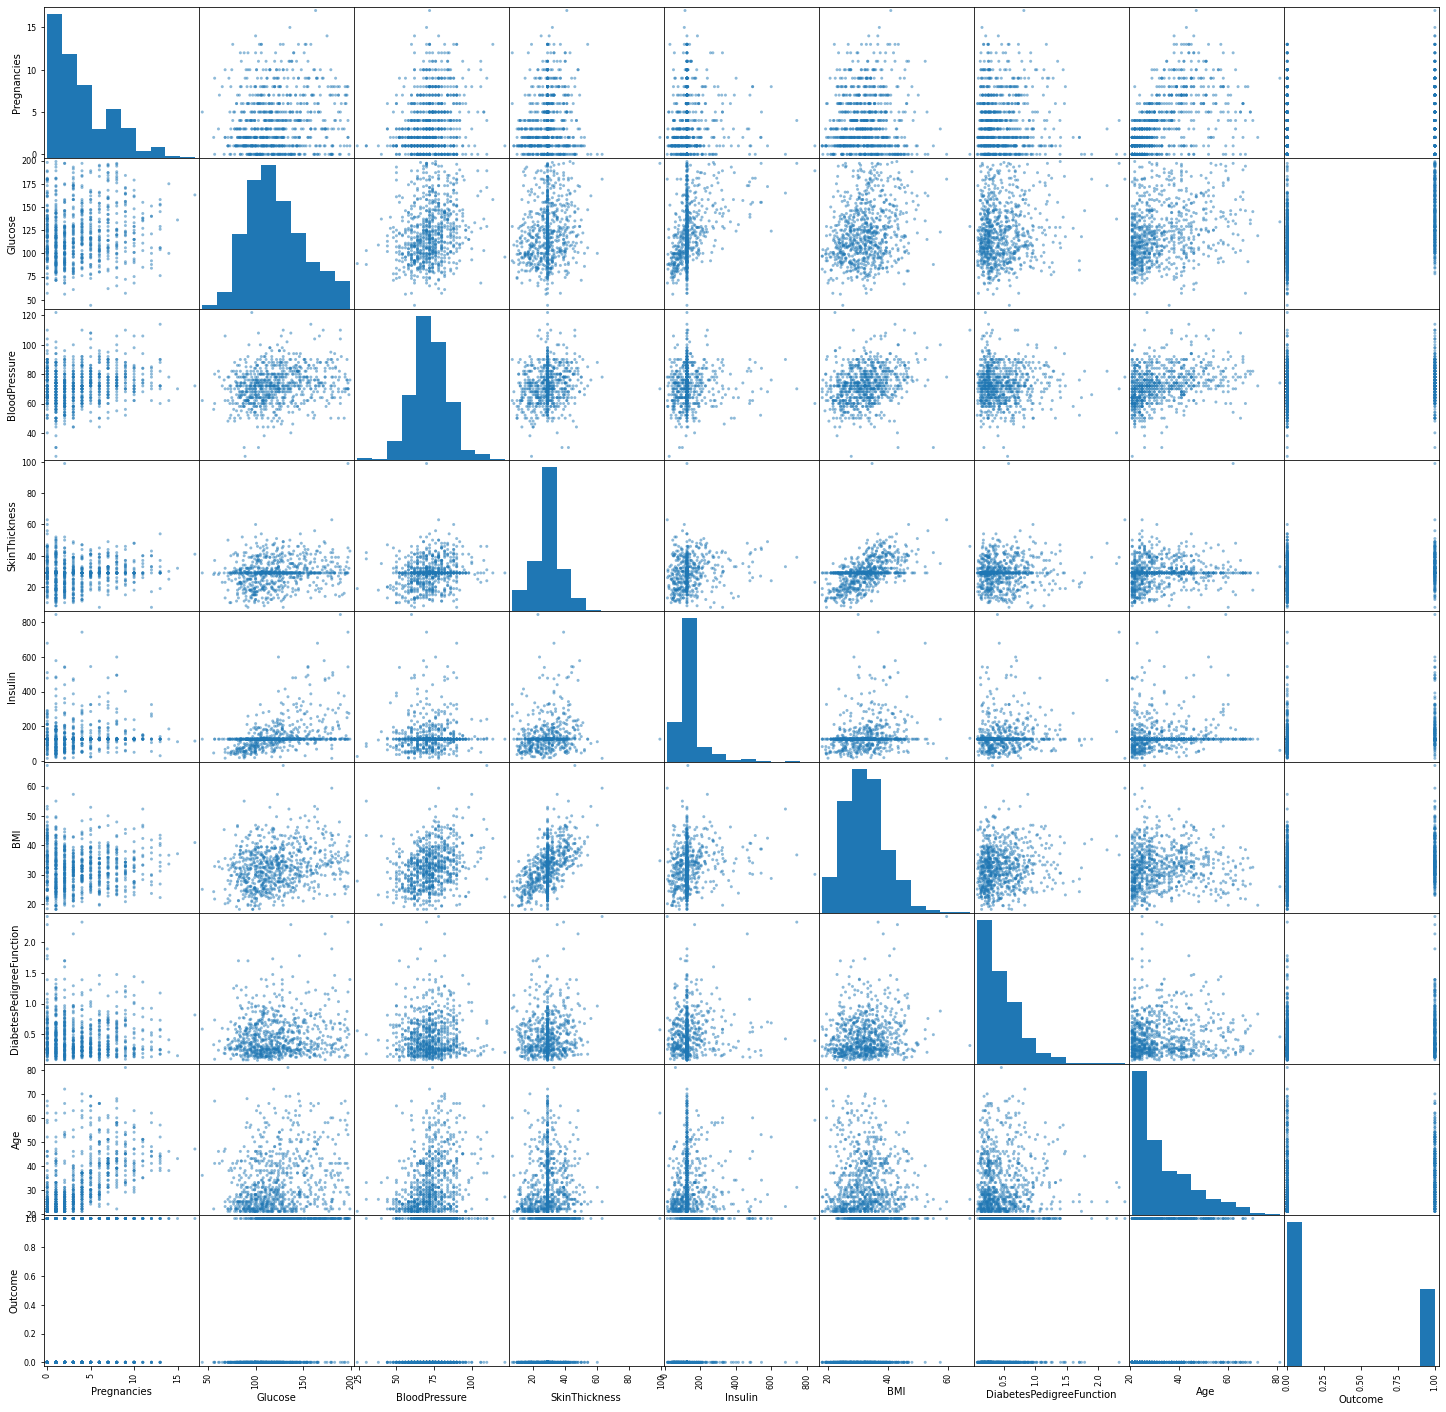

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(25, 25))
plt.show()

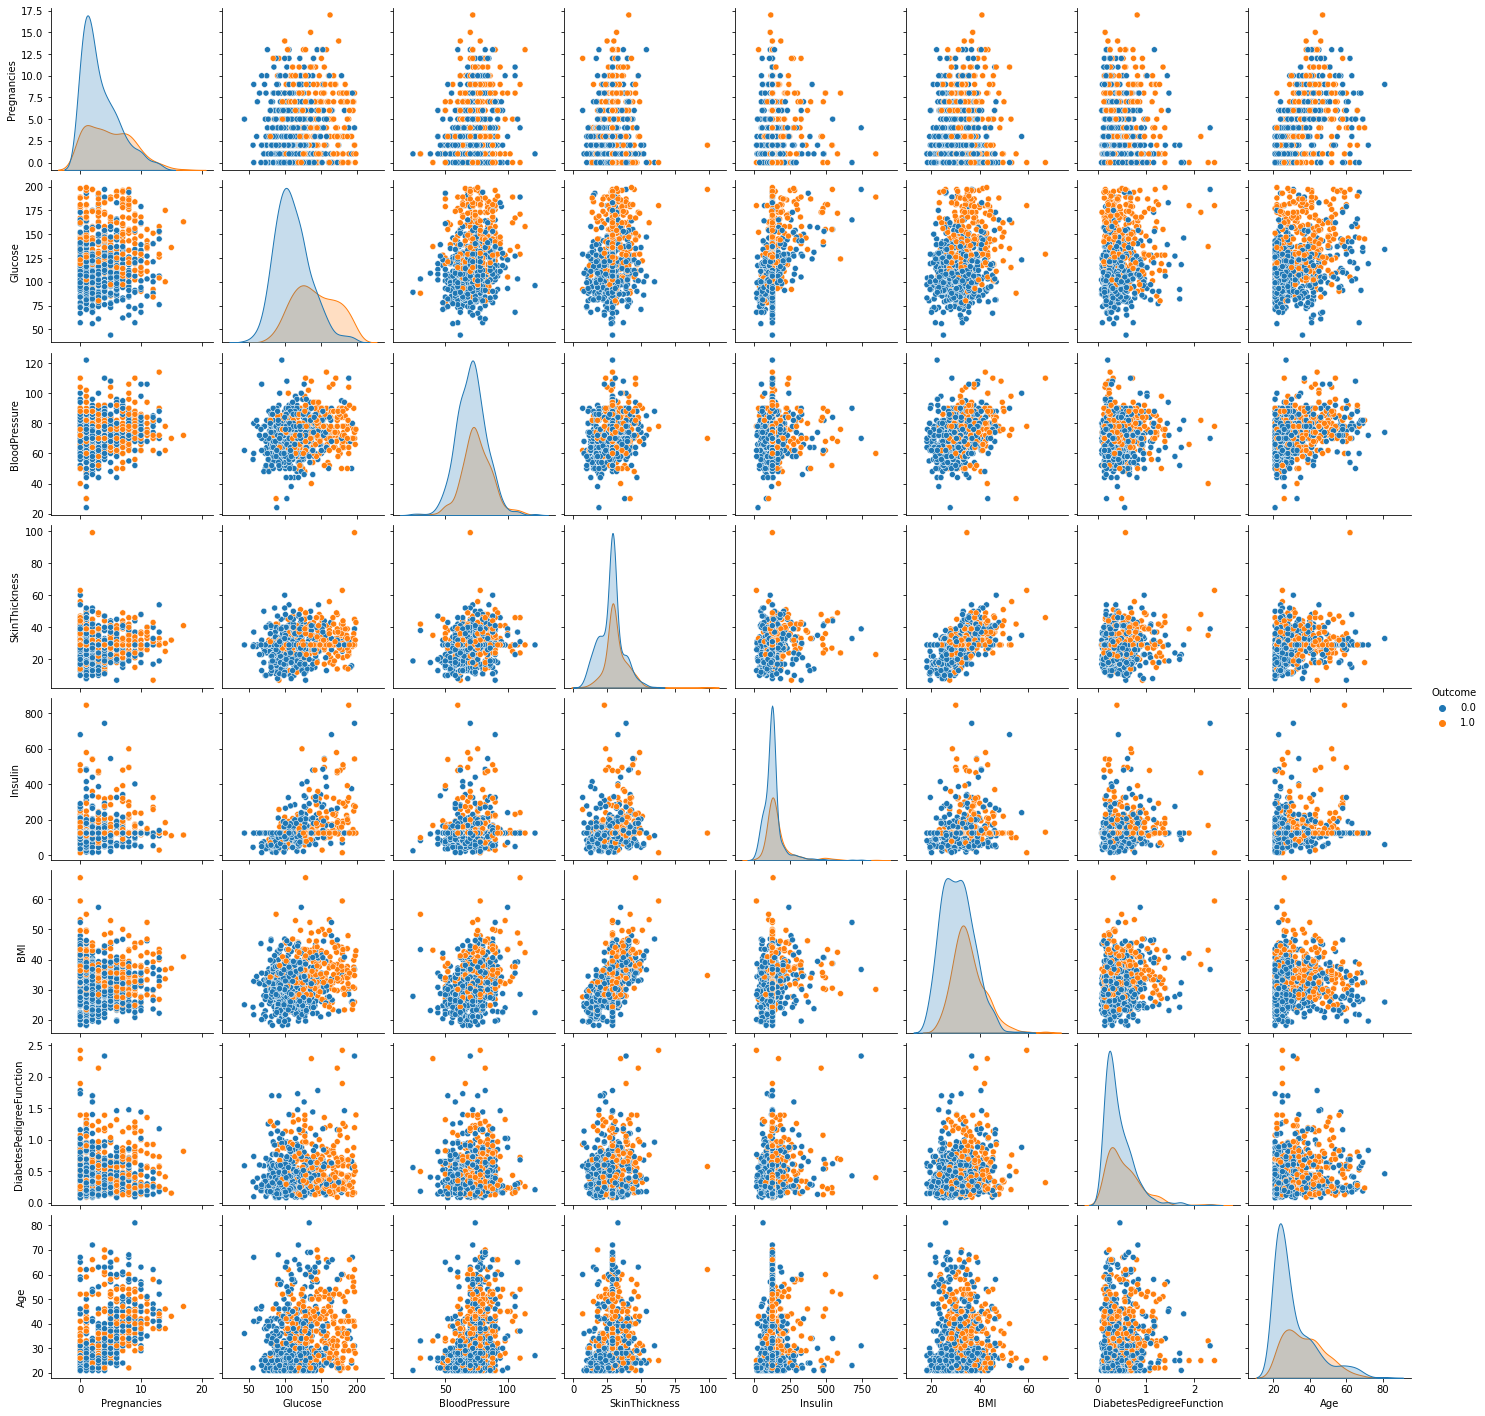

In [18]:
sns.pairplot(df,hue='Outcome')
plt.show()

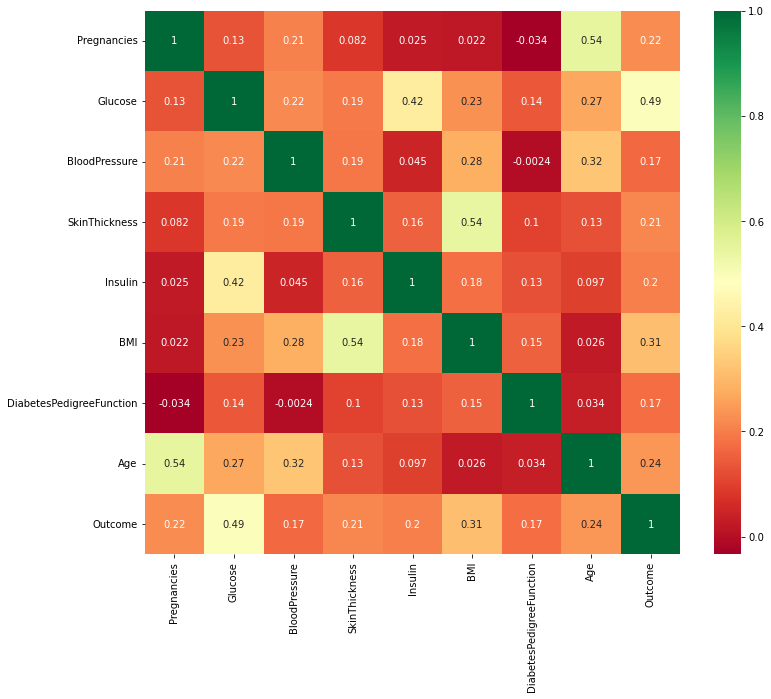

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')
plt.show()

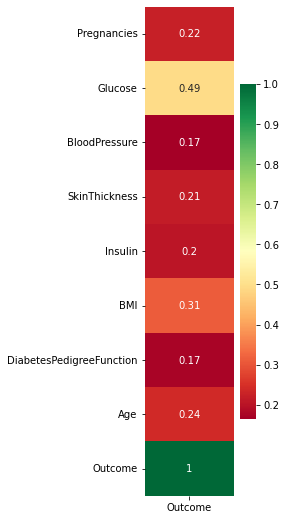

In [20]:
plt.figure(figsize=(2,9))
sns.heatmap(df.corr()[['Outcome']], annot=True,cmap ='RdYlGn')
plt.show()

In [21]:
df
 
 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,125.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,29.0,125.0,30.1,0.349,47.0,1.0


In [22]:
x = df.drop(['Outcome'],axis=1)
y = df.Outcome

In [23]:
print(x.Glucose.mean())
print(x.Glucose.std())
print(x.Glucose.max())
print(x.Glucose.min())

121.65625
30.43828582241517
199.0
44.0


In [24]:
# minmax scaler or normalisation method(range = (0,1))
# lets check glucose 1st index by minmax formula=(xi-xmin)/(xmax-xmin)
(148-44)/(199-44)

0.6709677419354839

In [25]:
# standard scaler or zscore scaled data will have mean = 0 and std = 1
# lets check glucose 1st index by standard scaler formula = xi-x(mean)/x(std)
(148-121.68)/30.43

0.8649359185014786

In [26]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = sc.fit_transform(x[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']])

In [27]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,125.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,29.0,125.0,30.1,0.349,47.0


In [28]:
x.Glucose.std()

30.43828582241517

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
testing_score = []
training_score = []
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(xtrain,ytrain)
    training_score.append(knn.score(xtrain,ytrain))
    testing_score.append(knn.score(xtest,ytest))

In [31]:
training_score

[1.0,
 0.8420195439739414,
 0.8403908794788274,
 0.8110749185667753,
 0.7996742671009772,
 0.7996742671009772,
 0.8045602605863192,
 0.7980456026058632,
 0.7996742671009772,
 0.7996742671009772,
 0.7980456026058632,
 0.7899022801302932,
 0.7964169381107492,
 0.7931596091205212]

In [32]:
testing_score

[0.6558441558441559,
 0.7077922077922078,
 0.6948051948051948,
 0.7012987012987013,
 0.7207792207792207,
 0.7337662337662337,
 0.7467532467532467,
 0.7467532467532467,
 0.7402597402597403,
 0.7402597402597403,
 0.7272727272727273,
 0.7207792207792207,
 0.7207792207792207,
 0.7402597402597403]

In [33]:
max_training_score = max(training_score)
train_scores_ind = [i for i, v in enumerate(training_score) if v == max_training_score]
print('Max training score {} % and k = {}'.format(max_training_score*100,list(map(lambda x: 
x+1, train_scores_ind))))

Max training score 100.0 % and k = [1]


In [34]:
max_testing_score = max(testing_score)
test_scores_ind = [i for i, v in enumerate(testing_score) if v == max_testing_score]
print('Max testing score {} % and k = {}'.format(max_testing_score*100,list(map(lambda x: 
x+1, test_scores_ind))))

Max testing score 74.67532467532467 % and k = [7, 8]


In [35]:
# As maximum testing score we got at index 12 that means n_neighbors value of 12 will give the
# best accuracy.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(12)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=12)

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
yhat = knn.predict(xtest)

In [37]:
accuracy_score(ytest,yhat)

0.7207792207792207

In [38]:
confusion_matrix(ytest,yhat).transpose()

array([[85, 28],
       [15, 26]], dtype=int64)

In [39]:
print(classification_report(ytest,yhat))

              precision    recall  f1-score   support

         0.0       0.75      0.85      0.80       100
         1.0       0.63      0.48      0.55        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.67       154
weighted avg       0.71      0.72      0.71       154



In [40]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,125.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,29.0,125.0,30.1,0.349,47.0


In [41]:
new_pred = [[6,148,72,35,125,33.6,0.627,50]]

In [42]:
knn.predict(new_pred)

array([0.])

In [43]:
import pickle

In [44]:
pickle.dump(knn,open('knn_model.pkl','wb'))

In [45]:
pickle_model = pickle.load(open('knn_model.pkl','rb'))

In [46]:
pickle_model.predict(new_pred)

array([0.])